In [10]:
import pandas as pd

def load_df_vehicules():
    df_list = []
    for year in range(2010,2022):
        sep = '_'
        if year > 2016 :
            sep = '-'
        file_path = './data/{}{}{}.csv'.format('vehicules',sep,year)
        print(file_path)
        if kwargs.get(str(year)):
            df = pd.read_csv(file_path,**kwargs.get(str(year)))
        else : 
            df = pd.read_csv(file_path)
        df_list.append(df)
    return pd.concat(df_list)
df_car = pd.read_csv('data/caracteristiques.csv',dtype={'dep':'str','com':'str','code_insee':'str'})

#df_vehicules = load_df_vehicules()


In [ ]:
import seaborn as sns
group_com_all = df_car.groupby('code_insee')['Num_Acc'].nunique().sort_values(ascending=False)
df_group_com_all = group_com_all.reset_index().loc[0:9, :]
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="code_insee", y="Num_Acc",data=df_group_com_all, linewidth=1, palette="deep").set(title ='Accidents de la route par commune' )

In [220]:
df_velos = df_vehicules[df_vehicules['catv'].isin([1,50,60,80])]

In [221]:
df_accidents_velo = df_car.merge(df_velos,how='inner',on='Num_Acc')

In [222]:
df_accidents_velo.drop_duplicates(subset=['Num_Acc'], keep='last',inplace=True)

In [193]:
df_accidents_velo['long'].isna().sum()

15964

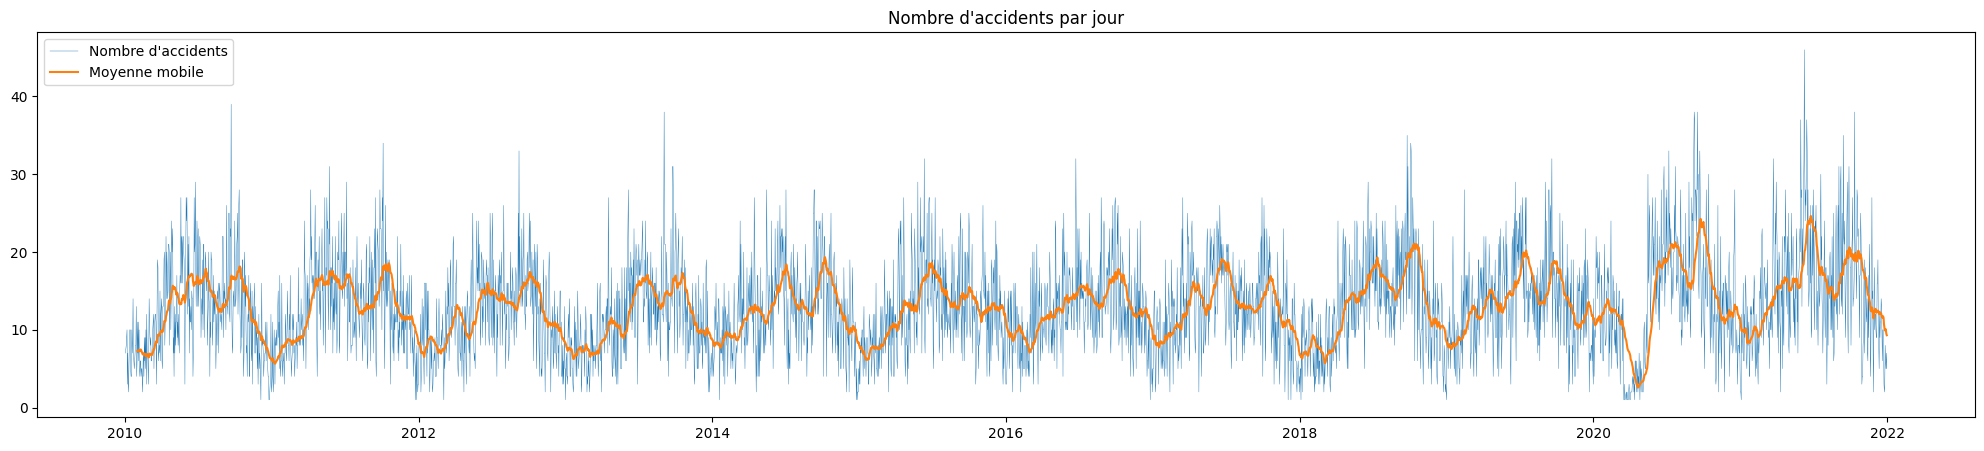

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,5))
plt.plot(df_accidents_velo.groupby('date')['date'].agg(['count']), linewidth=0.3, label="Nombre d'accidents")
plt.plot(df_accidents_velo.groupby('date')['date'].agg(['count']).rolling(window=30).mean(),label='Moyenne mobile')
plt.title("Nombre d'accidents par jour")
plt.legend()
plt.show()

In [44]:
df_accidents_velo.groupby('an')['an'].count()

an
10      4405
11      4732
12      4360
13      4194
14      4565
15      4598
16      4558
17      4682
18      4789
2019    4973
2020    4969
2021    5565
Name: an, dtype: int64

In [45]:
df_paris = df_accidents_velo[df_accidents_velo['dep'].astype(str).isin(departments)]

In [46]:
df_paris.groupby('an')['an'].count()

an
10       606
11       723
12       704
13       771
14       806
15       752
16       858
17       770
18       721
2019     853
2020    1123
2021    1045
Name: an, dtype: int64

<Figure size 640x480 with 0 Axes>

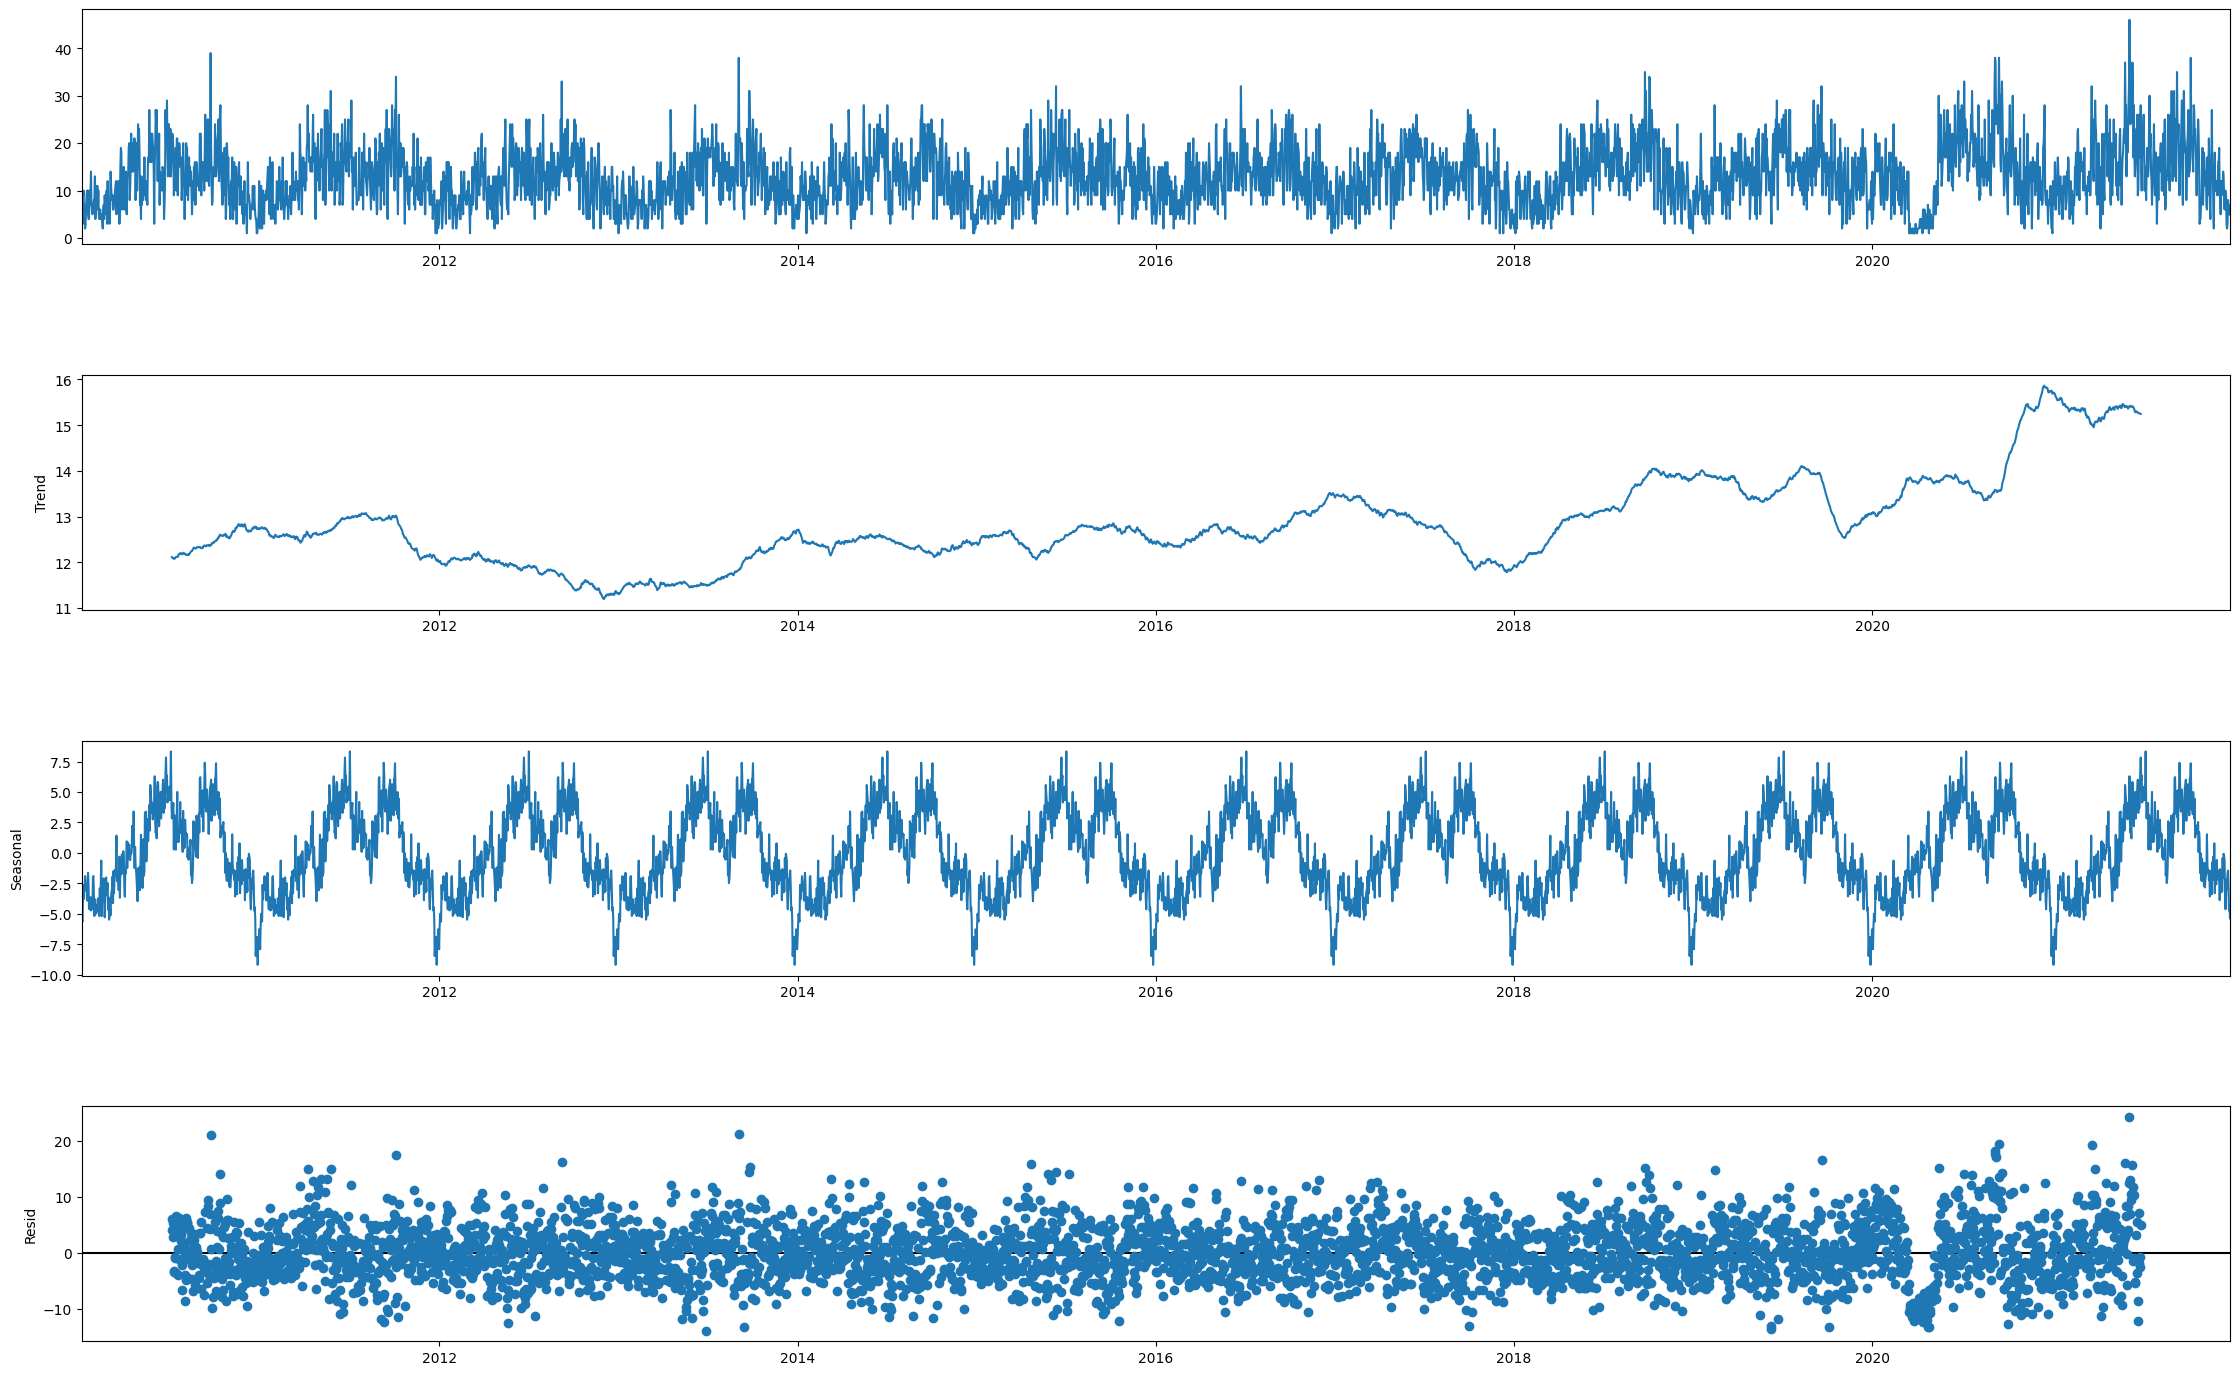

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_accidents_velo.groupby('date')['date'].agg(['count']), period=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(25,15)
plt.show()

/home/romainfournier/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


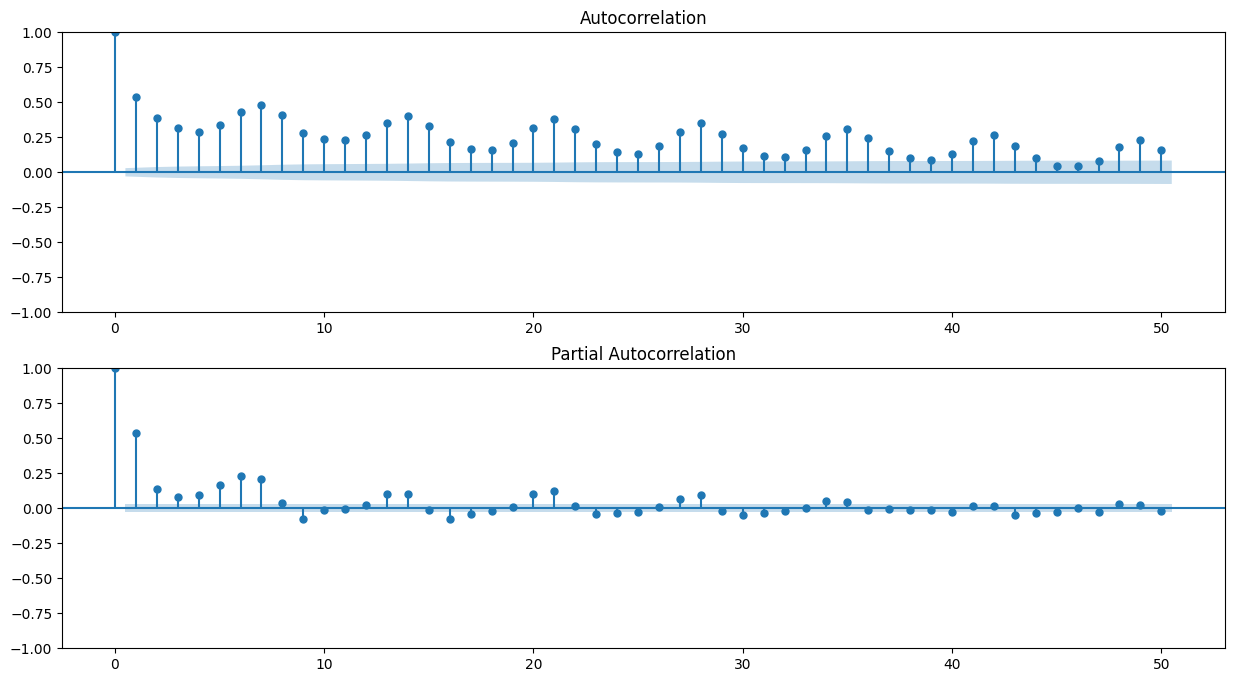

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(15,8))

fig = plot_acf(df_accidents_velo.groupby('date')['date'].agg(['count']), lags=50, ax=axes[0])
fig = plot_pacf(df_accidents_velo.groupby('date')['date'].agg(['count']), lags=50, ax=axes[1])

/tmp/ipykernel_141/3783936528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_accidents_velo.corr())


<AxesSubplot:>

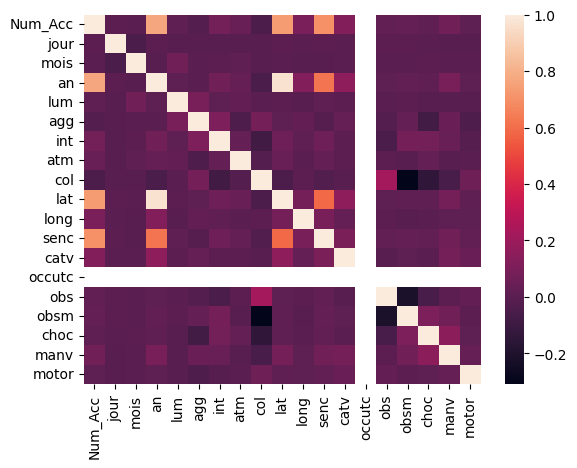

In [54]:
import seaborn as sns
sns.heatmap(df_accidents_velo.corr())

In [65]:
df_accidents_metropole = df_accidents_velo.loc[(df_accidents_velo['long'] < 20) & (df_accidents_velo['lat'] > 30) & (df_accidents_velo['lat'] < 52)]
df_accidents_metropole.loc[:, ('atm', 'col')].fillna(0, inplace=True)

[Text(0.5, 1.0, 'Accidents à vélo en métropole')]

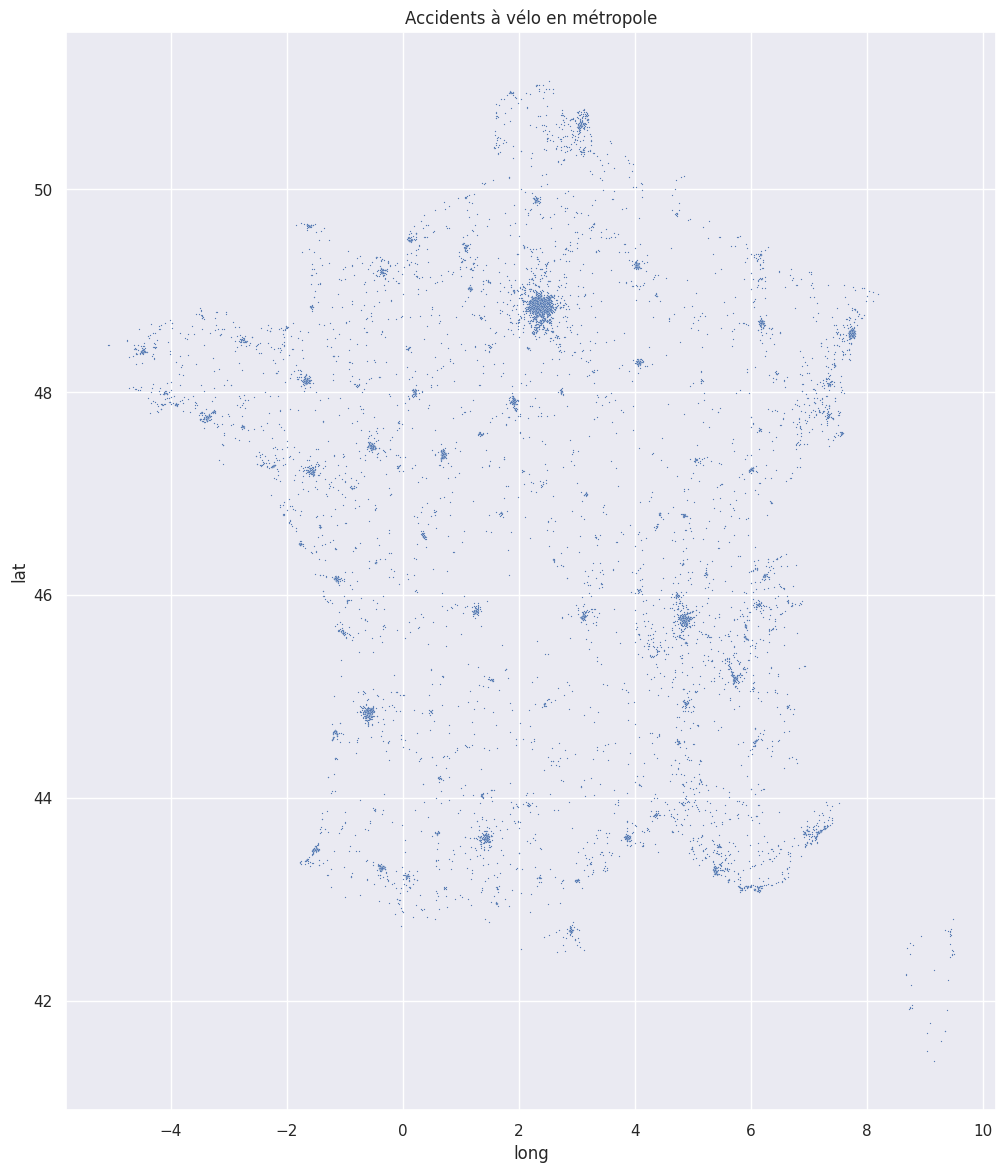

In [88]:
plt.figure(figsize=(12,14))
sns.scatterplot(data=df_accidents_metropole, x="long", y="lat",s=0.9).set(title ='Accidents à vélo en métropole' )

In [74]:
group_com = df_accidents_velo.groupby('com')['Num_Acc'].nunique().sort_values(ascending=False)
df_group_com = group_com.reset_index().loc[0:9, :]

In [85]:
group_year = df_accidents_velo.groupby('an')['Num_Acc'].nunique()
df_group_year = group_year.reset_index()

[Text(0.5, 1.0, 'Accidents de vélo par année')]

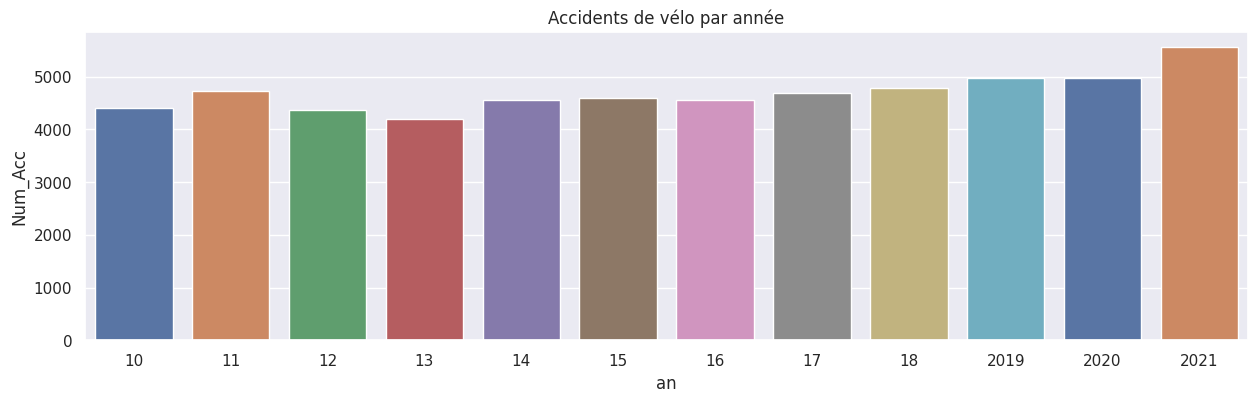

In [86]:
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="an", y="Num_Acc",data=df_group_year, linewidth=1, palette="deep").set(title ='Accidents de vélo par année' )

KeyError: 'grav'

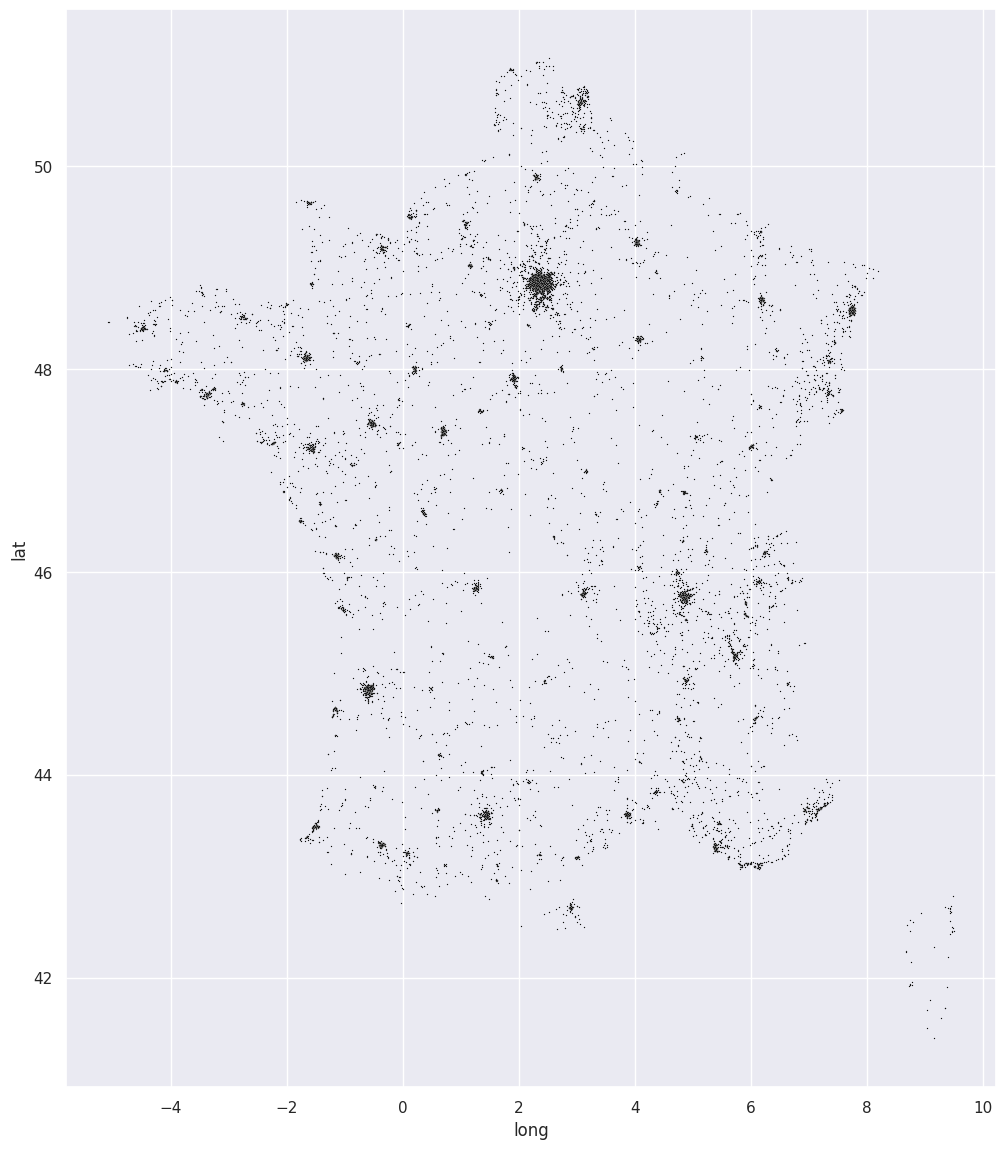

In [89]:
sns.set(rc={'figure.figsize':(12,14)})
sns.scatterplot(data=df_accidents_metropole, x="long", y="lat", s=0.9, color="black")
sns.scatterplot(data=df_accidents_metropole[df_accidents_metropole['grav'] == 2], x="long", y="lat", s=1, color="red").set(title ='Location of the accident (Metropole), deadliest zones' )

[Text(0.5, 1.0, 'Accidents de vélo par commune')]

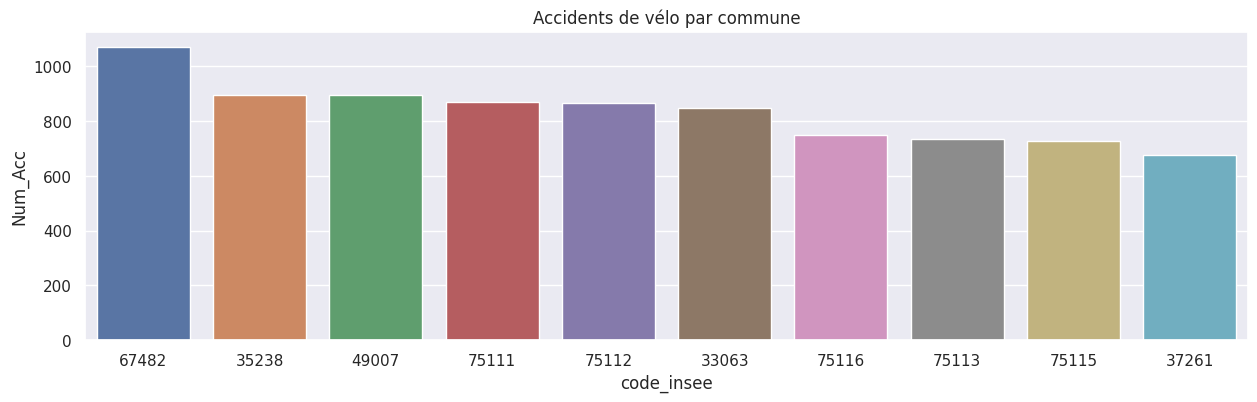

In [223]:
group_com = df_accidents_velo.groupby('code_insee')['Num_Acc'].nunique().sort_values(ascending=False)
df_group_com = group_com.reset_index().loc[0:9, :]
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="code_insee", y="Num_Acc",data=df_group_com, linewidth=1, palette="deep").set(title ='Accidents de vélo par commune' )

In [204]:
df_accidents_velo[df_accidents_velo['code_insee']=='67482']

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,date,code_insee
2650,201000040491,5,1,10,1350,1,67,482,2,2,...,0.0,0.0,2.0,1.0,1.0,B01,NaN,NaN,2010-01-05,67482
2651,201000040494,9,1,10,1815,5,67,482,2,1,...,0.0,0.0,2.0,4.0,15.0,B01,NaN,NaN,2010-01-09,67482
2652,201000040508,26,1,10,840,1,67,482,2,2,...,0.0,0.0,2.0,7.0,19.0,B01,NaN,NaN,2010-01-26,67482
2653,201000040510,28,1,10,600,2,67,482,2,1,...,0.0,0.0,2.0,4.0,1.0,B01,NaN,NaN,2010-01-28,67482
2654,201000040525,19,2,10,1300,1,67,482,2,1,...,0.0,0.0,2.0,3.0,19.0,B01,NaN,NaN,2010-02-19,67482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61589,202100048664,8,3,2021,10:20,1,67,67482,2,3,...,NaN,0.0,2.0,1.0,1.0,B01,114 768,3.0,2021-03-08,67482
61732,202100049622,27,2,2021,16:10,1,67,67482,2,1,...,NaN,0.0,1.0,0.0,1.0,A01,113 045,3.0,2021-02-27,67482
61733,202100049624,26,2,2021,11:20,1,67,67482,2,8,...,NaN,0.0,2.0,1.0,2.0,B01,113 042,5.0,2021-02-26,67482
62205,202100053443,26,1,2021,08:00,2,67,67482,2,1,...,NaN,0.0,2.0,1.0,1.0,B01,106 190,5.0,2021-01-26,67482


In [227]:
df_stacked = group_com.reset_index().merge(group_com_all.reset_index(),how='inner',on='code_insee')

In [233]:
df_stacked['proportion']=df_stacked['Num_Acc_x']/df_stacked['Num_Acc_y']

In [243]:
df_stacked = df_stacked.sort_values(by='proportion',ascending=False)

In [244]:
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="code_insee", y="proportion",data=df_stacked.loc[0:9,:], linewidth=1, palette="deep").set(title ='Accidentalité à vélo par commune' )

[Text(0.5, 1.0, 'Accidentalité à vélo par commune')]

Error in callback <function flush_figures at 0x7f44104c7b50> (for post_execute):


KeyboardInterrupt: 

In [246]:
df_stacked[df_stacked['Num_Acc_y']>100]

,code_insee,Num_Acc_x,Num_Acc_y,proportion
0,67482,1072,3917,0.273679
233,67462,37,136,0.272059
18,69383,499,1926,0.259086
30,75103,352,1362,0.258443
20,75104,484,1896,0.255274
...,...,...,...,...
6692,13043,1,211,0.004739
5608,69297,1,218,0.004587
4273,91340,1,301,0.003322
6715,13214,1,323,0.003096
